In [1]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [2]:
%pip install PyPDF2
import PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 7.6 MB/s 


In [3]:
f = open(r'animal-farm.pdf', 'rb')

In [4]:
animal_farm = PyPDF2.PdfFileReader(f)

In [5]:
animal_farm.getNumPages()

56

In [6]:
chapters = []

start = 4
end_chapters = [9, 14, 18, 21, 26, 31, 37, 44, 50, 56]
text = ""
for cn in range(0, 10):
  print(f'chapter {cn + 1}')
  text = ""
  for p in range(start, animal_farm.getNumPages()):
    print(f'\rPage:{p}')
    text += animal_farm.getPage(p).extract_text()
    if end_chapters[cn] - 1 == p:
      chapters.append(text)
      start = end_chapters[cn]
      break

chapter 1
Page:4
Page:5
Page:6
Page:7
Page:8
chapter 2
Page:9
Page:10
Page:11
Page:12
Page:13
chapter 3
Page:14
Page:15
Page:16
Page:17
chapter 4
Page:18
Page:19
Page:20
chapter 5
Page:21
Page:22
Page:23
Page:24
Page:25
chapter 6
Page:26
Page:27
Page:28
Page:29
Page:30
chapter 7
Page:31
Page:32
Page:33
Page:34
Page:35
Page:36
chapter 8
Page:37
Page:38
Page:39
Page:40
Page:41
Page:42
Page:43
chapter 9
Page:44
Page:45
Page:46
Page:47
Page:48
Page:49
chapter 10
Page:50
Page:51
Page:52
Page:53
Page:54
Page:55


In [7]:
print(chapters[1])

Chapter Two 
  Three nights later old Major died peacefully in his sleep. His body was buried at the foot of the orchard. This was early in March. During the next three months there was much secret activity. Major's speech had given to the more intelligent animals on the farm a completely new outlook on life. They did not know when the Rebellion predicted by Major would take place, they had no reason for thinking that it would be within their own lifetime, but they saw clearly that it was their duty to prepare for it. The work of teaching and organising the others fell naturally upon the pigs, who were generally recognised as being the cleverest of the animals. Pre-eminent among the pigs were two young boars named Snowball and Napoleon, whom Mr. Jones was breeding up for sale. Napoleon was a large, rather fierce-looking Berkshire boar, the only Berkshire on the farm, not much of a talker, but with a reputation for getting his own way. Snowball was a more vivacious pig than Napoleon, qu

<h2>Functions</h2>
Define functions to process the text

In [8]:
def token_frequency(txt, not_include=[], only_include=[], verbos=False):
    if len(not_include) != 0 and len(only_include) != 0: 
        raise Exception('Cannot specify both "not_include" and "only_include"')
    words = dict()
    doc = nlp(txt)
    for token in doc:
        if token.pos_ in not_include: continue
        if len(only_include) != 0 and token.pos_ not in only_include: continue
        if nlp.vocab[token.lemma_].is_stop: continue
        if token.lemma_ not in words.keys():
            words[token.lemma_] = 1
        else: words[token.lemma_] += 1
        if verbos: print(f"{token.text:{16}} {token.pos_:{12}} {token.dep_:{12}} {token.lemma_:{16}} {spacy.explain(token.tag_)}")
    
    words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
    return words

<h1>Chapter One</h1>
Let's try to process chapter one

In [9]:
chapter1_doc = nlp(chapters[0])

In [10]:
chapter1_doc.text

'Chapter One  \nMr. Jones, of the Manor Farm, had locked the hen-houses for the night, but was too drunk to remember to shut the popholes. With the ring of light from his lantern dancing from side to side, he lurched across the yard, kicked off his boots at the back door, drew himself a last glass of beer from the barrel in the scullery, and made his way up to bed, where Mrs. Jones was already snoring. As soon as the light in the bedroom went out there was a stirring and a fluttering all through the farm buildings. Word had gone round during the day that old Major, the prize Middle White boar, had had a strange dream on the previous night and wished to communicate it to the other animals. It had been agreed that they should all meet in the big barn as soon as Mr. Jones was safely out of the way. Old Major (so he was always called, though the name under which he had been exhibited was Willingdon Beauty) was so highly regarded on the farm that everyone was quite ready to lose an hour\'s 

In [11]:
words = token_frequency(chapters[0], not_include=['SPACE', 'PUNCT', 'NUM'], verbos=True)

Chapter          NOUN         compound     chapter          noun, singular or mass
Mr.              PROPN        compound     Mr.              noun, proper singular
Jones            PROPN        nsubj        Jones            noun, proper singular
Manor            PROPN        compound     Manor            noun, proper singular
Farm             PROPN        pobj         Farm             noun, proper singular
locked           VERB         ROOT         lock             verb, past participle
hen              NOUN         compound     hen              noun, singular or mass
houses           NOUN         dobj         house            noun, plural
night            NOUN         pobj         night            noun, singular or mass
drunk            ADJ          acomp        drunk            adjective (English), other noun-modifier (Chinese)
remember         VERB         xcomp        remember         verb, base form
shut             VERB         xcomp        shut             verb, base form
popho

In [12]:
words

{'animal': 24,
 'comrade': 15,
 'come': 13,
 'life': 13,
 'old': 11,
 'Man': 11,
 'Major': 10,
 'shall': 10,
 'year': 9,
 'England': 9,
 'Jones': 8,
 'horse': 8,
 'night': 7,
 'farm': 7,
 'day': 7,
 'dream': 7,
 'pig': 7,
 'dog': 7,
 'beast': 7,
 'word': 7,
 'sing': 7,
 'long': 6,
 'begin': 6,
 'cow': 6,
 'song': 6,
 'soon': 5,
 'straw': 5,
 'Boxer': 5,
 'time': 5,
 'know': 5,
 'labour': 5,
 'enemy': 5,
 'rat': 5,
 'tune': 5,
 'Mr.': 4,
 'hen': 4,
 'remember': 4,
 'bed': 4,
 'round': 4,
 'barn': 4,
 'lose': 4,
 'end': 4,
 'sheep': 4,
 'Clover': 4,
 'great': 4,
 'white': 4,
 'work': 4,
 'place': 4,
 'throat': 4,
 'let': 4,
 'draw': 3,
 'way': 3,
 'sleep': 3,
 'settle': 3,
 'perch': 3,
 'set': 3,
 'tremendous': 3,
 'fly': 3,
 'speak': 3,
 'moment': 3,
 'listen': 3,
 'clear': 3,
 'pass': 3,
 'lay': 3,
 'nature': 3,
 'live': 3,
 'miserable': 3,
 'free': 3,
 'land': 3,
 'continue': 3,
 'produce': 3,
 'human': 3,
 'man': 3,
 'creature': 3,
 'milk': 3,
 'egg': 3,
 'bare': 3,
 'field': 3,
 'fu

<h1>Animal Farm</h1>
Here we process the way we did for chapter one but now it is done for the whole book

In [13]:
whole_text = ''

for chapter in chapters:
    whole_text += chapter + '\n'
    
words = token_frequency(whole_text, not_include=['PUNCT', 'NUM', 'SPACE', 'PROPN'], verbos=True)

Streaming output truncated to the last 5000 lines.
came             AUX          aux          came             verb, past tense
creeping         VERB         ROOT         creep            verb, gerund or present participle
cover            NOUN         pobj         cover            noun, singular or mass
darkness         NOUN         pobj         darkness         noun, singular or mass
performed        VERB         conj         perform          verb, past tense
kinds            NOUN         dobj         kind             noun, plural
mischief         NOUN         pobj         mischief         noun, singular or mass
stole            VERB         ccomp        steal            verb, past tense
corn             NOUN         dobj         corn             noun, singular or mass
upset            VERB         ccomp        upset            verb, past tense
milk             NOUN         compound     milk             noun, singular or mass
-pails           NOUN         dobj         -pail          

In [14]:
words

{'animal': 299,
 'farm': 121,
 'pig': 116,
 'come': 95,
 'work': 95,
 'time': 88,
 'day': 87,
 'windmill': 71,
 'comrade': 67,
 'dog': 62,
 'round': 53,
 'long': 48,
 'moment': 48,
 'man': 47,
 'leg': 46,
 'old': 45,
 'know': 42,
 'human': 42,
 'year': 40,
 'way': 36,
 'end': 36,
 'sheep': 36,
 'good': 36,
 'farmhouse': 34,
 'begin': 33,
 'find': 33,
 'great': 32,
 'life': 32,
 'hard': 32,
 'yard': 30,
 'word': 30,
 'happen': 30,
 'order': 29,
 'horse': 29,
 'look': 29,
 'think': 29,
 'little': 29,
 'morning': 29,
 'cry': 29,
 'hen': 28,
 'night': 28,
 'set': 27,
 'stand': 27,
 'remember': 26,
 'run': 26,
 'break': 26,
 'barn': 25,
 'hear': 25,
 'field': 25,
 'use': 25,
 'thing': 25,
 'away': 25,
 'appear': 25,
 'soon': 24,
 'building': 24,
 'lie': 24,
 'hoof': 24,
 'later': 24,
 'live': 24,
 'week': 24,
 'believe': 24,
 'read': 24,
 'bed': 23,
 'speak': 23,
 'shall': 23,
 'hour': 22,
 'cow': 22,
 'labour': 22,
 'bad': 21,
 'place': 21,
 'gun': 21,
 'early': 21,
 'like': 21,
 'wall': 2

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
df = pd.DataFrame({'word':words.keys(), 'frequency':words.values()})

In [17]:
df.head(20)

,word,frequency
0,animal,299
1,farm,121
2,pig,116
3,come,95
4,work,95
5,time,88
6,day,87
7,windmill,71
8,comrade,67
9,dog,62


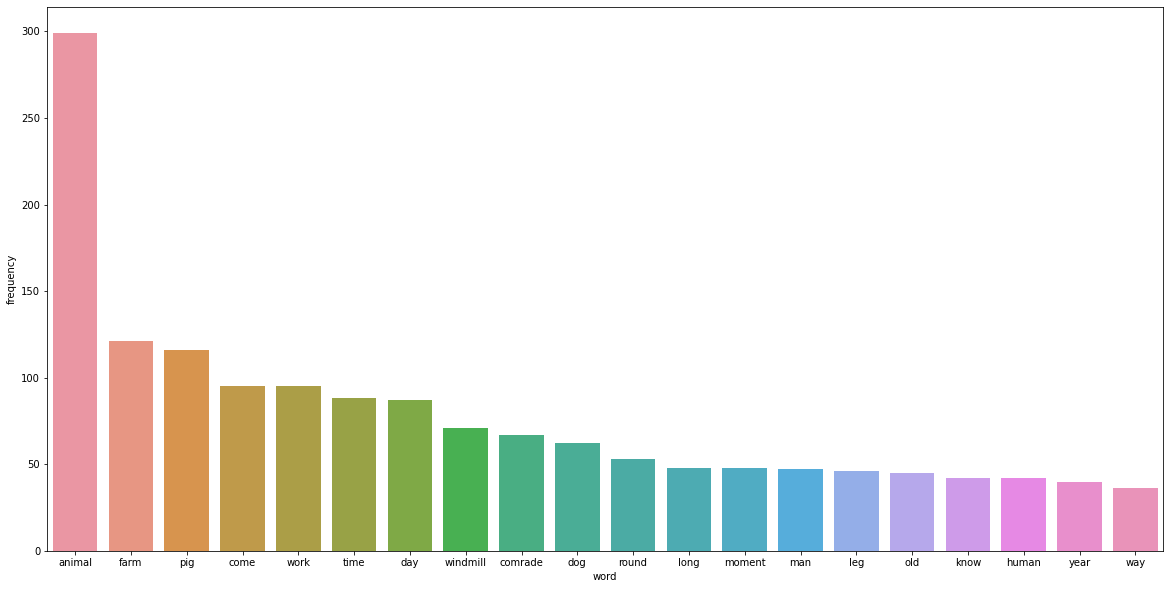

In [18]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df.iloc[:20], x='word', y='frequency');

In [19]:
df_indexed = df.set_index('word')
df_indexed.head(20)

,frequency
word,
animal,299
farm,121
pig,116
come,95
work,95
time,88
day,87
windmill,71
comrade,67


In [20]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(words)

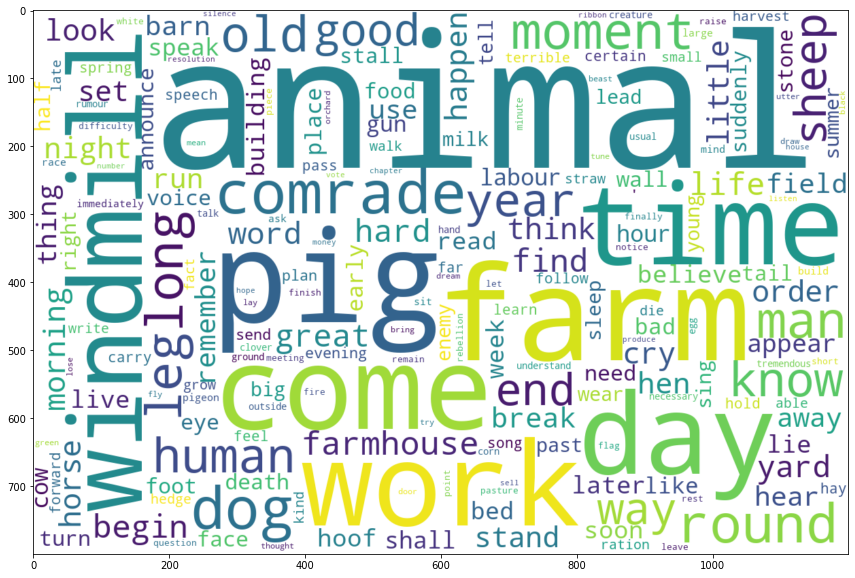

In [21]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')

### Try looking at word cloud for only Verbs

In [22]:
verbs = token_frequency(whole_text, only_include=['VERB'], verbos=True)

locked           VERB         ROOT         lock             verb, past participle
remember         VERB         xcomp        remember         verb, base form
shut             VERB         xcomp        shut             verb, base form
lurched          VERB         ROOT         lurch            verb, past tense
kicked           VERB         conj         kick             verb, past tense
drew             VERB         conj         draw             verb, past tense
snoring          VERB         relcl        snore            verb, gerund or present participle
wished           VERB         conj         wish             verb, past tense
communicate      VERB         xcomp        communicate      verb, base form
agreed           VERB         ROOT         agree            verb, past participle
meet             VERB         ccomp        meet             verb, base form
exhibited        VERB         relcl        exhibit          verb, past participle
regarded         VERB         acomp        rega

In [23]:
verbs

{'come': 94,
 'work': 43,
 'know': 42,
 'begin': 33,
 'find': 33,
 'happen': 30,
 'think': 29,
 'stand': 27,
 'remember': 26,
 'set': 26,
 'look': 26,
 'run': 26,
 'break': 26,
 'hear': 25,
 'appear': 25,
 'live': 24,
 'believe': 24,
 'read': 24,
 'speak': 23,
 'announce': 20,
 'lie': 19,
 'use': 19,
 'turn': 19,
 'cry': 19,
 'sing': 18,
 'lead': 17,
 'tell': 17,
 'wear': 17,
 'send': 17,
 'feel': 16,
 'pass': 16,
 'carry': 16,
 'learn': 16,
 'follow': 16,
 'grow': 15,
 'die': 15,
 'write': 15,
 'walk': 14,
 'ask': 14,
 'sleep': 14,
 'sit': 14,
 'build': 14,
 'understand': 13,
 'hold': 13,
 'raise': 12,
 'notice': 12,
 'finish': 12,
 'draw': 11,
 'lose': 11,
 'talk': 11,
 'round': 11,
 'lay': 11,
 'let': 11,
 'bring': 11,
 'remain': 11,
 'leave': 11,
 'listen': 10,
 'sell': 10,
 'discover': 10,
 'need': 10,
 'try': 10,
 'race': 10,
 'rush': 10,
 'utter': 10,
 'buy': 10,
 'meet': 9,
 'fall': 9,
 'continue': 9,
 'save': 9,
 'drink': 9,
 'forget': 9,
 'fling': 9,
 'gaze': 9,
 'intend': 9,

In [24]:
verbs_df = pd.DataFrame({'word':verbs.keys(), 'frequency':verbs.values()})
verbs_df

,word,frequency
0,come,94
1,work,43
2,know,42
3,begin,33
4,find,33
...,...,...
861,melt,1
862,publish,1
863,thank,1
864,download,1


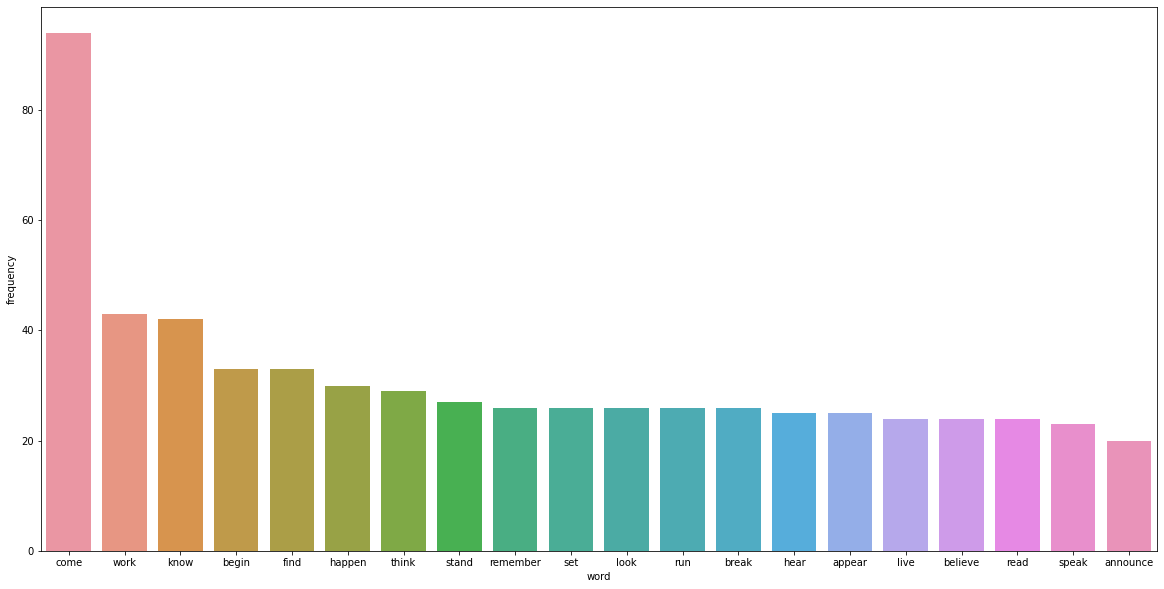

In [25]:
plt.figure(figsize=(20, 10))
sns.barplot(data=verbs_df.iloc[:20], x='word', y='frequency');

In [26]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(verbs)

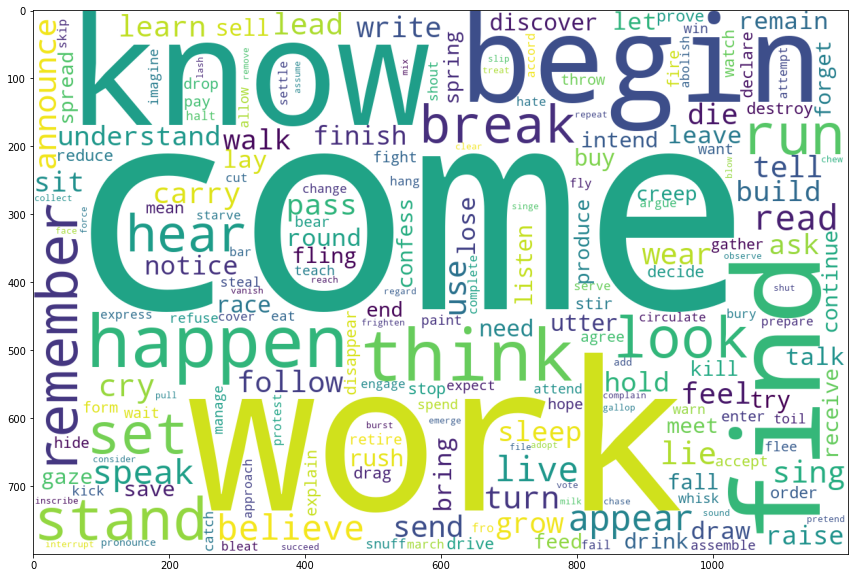

In [27]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud);

In [28]:
propns = token_frequency(whole_text, only_include=['PROPN'], verbos=True)

Mr.              PROPN        compound     Mr.              noun, proper singular
Jones            PROPN        nsubj        Jones            noun, proper singular
Manor            PROPN        compound     Manor            noun, proper singular
Farm             PROPN        pobj         Farm             noun, proper singular
Mrs.             PROPN        compound     Mrs.             noun, proper singular
Jones            PROPN        nsubj        Jones            noun, proper singular
Word             PROPN        nsubj        Word             noun, proper singular
Major            PROPN        nsubj        Major            noun, proper singular
Middle           PROPN        compound     Middle           noun, proper singular
White            PROPN        compound     White            noun, proper singular
Mr.              PROPN        compound     Mr.              noun, proper singular
Jones            PROPN        nsubj        Jones            noun, proper singular
Major           

In [29]:
propns

{'Napoleon': 168,
 'Snowball': 128,
 'Boxer': 96,
 'Jones': 83,
 'Squealer': 57,
 'Farm': 52,
 'Animal': 50,
 'Mr.': 44,
 'Frederick': 34,
 'Clover': 33,
 'Benjamin': 31,
 'England': 28,
 'Pilkington': 28,
 'Comrade': 26,
 'Mollie': 20,
 'Sunday': 20,
 'Major': 19,
 'Rebellion': 18,
 'Beasts': 18,
 'Whymper': 16,
 'Foxwood': 15,
 'Seven': 14,
 'Commandments': 14,
 'Muriel': 13,
 'Battle': 13,
 'Willingdon': 12,
 'Man': 12,
 'Pinchfield': 11,
 'Moses': 10,
 'Cowshed': 10,
 'Animalism': 8,
 'van': 8,
 'Manor': 7,
 'Hero': 7,
 'Leader': 7,
 'Sugarcandy': 6,
 'Mountain': 6,
 'Class': 6,
 'Mrs.': 5,
 'w': 5,
 'geese': 5,
 'C': 5,
 'd': 5,
 'Commandment': 5,
 'Bluebell': 4,
 'Jessie': 4,
 'al': 4,
 'white': 3,
 'S': 3,
 'Republic': 3,
 'Animals': 3,
 'Meeting': 3,
 'Committee': 3,
 'Sundays': 3,
 'January': 3,
 'Meetings': 3,
 'y': 3,
 'Minimus': 3,
 'February': 3,
 'f': 3,
 'Pincher': 2,
 'goat': 2,
 'Old': 2,
 'Ireland': 2,
 'Hearken': 2,
 'March': 2,
 'Berkshire': 2,
 'Master': 2,
 'Midsu

In [30]:
propn_df = pd.DataFrame({'word':propns.keys(), 'frequency':propns.values()})
propn_df

,word,frequency
0,Napoleon,168
1,Snowball,128
2,Boxer,96
3,Jones,83
4,Squealer,57
...,...,...
228,END,1
229,Julie,1
230,Global,1
231,Grey,1


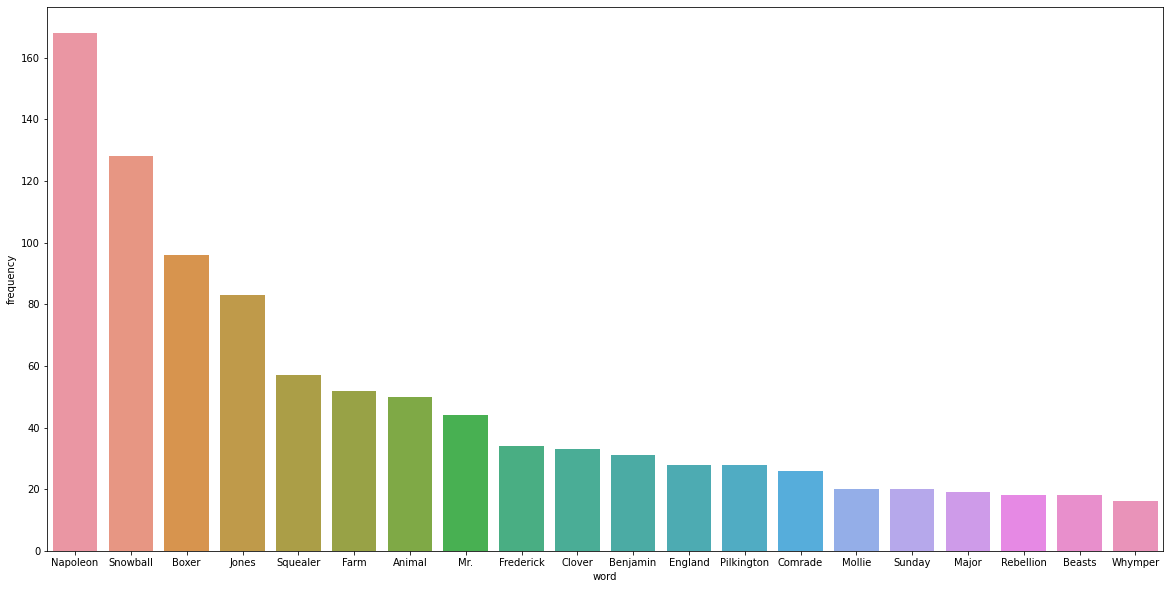

In [31]:
plt.figure(figsize=(20, 10))
sns.barplot(data=propn_df.iloc[:20], x='word', y='frequency');

In [32]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(propns)

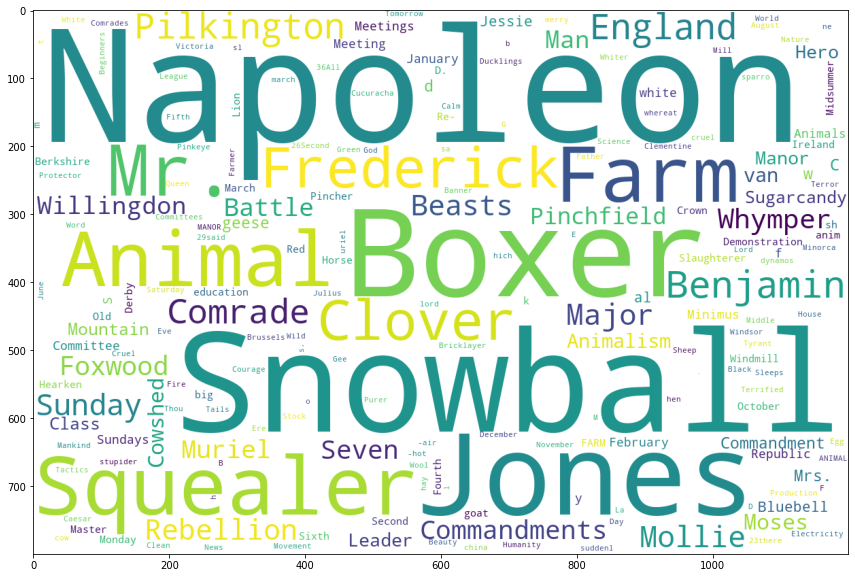

In [33]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud);